# Matrix Tranpose and Inverse Demonstration In Python

## Multiple Linear Regression: Calculating Parameters and Standard Errors Using Mathematical Estimation 

#### Using Performance Index Data



Multiple linear regression refers to a statistical technique that uses two or more independent variables to predict the outcome of a dependent variable. The technique enables analysts to determine the variation of the model and the relative contribution of each independent variable in the total variance.

### Statistical Model in Linear Regression,

>$Y = b0 + b1x1 + b2x2 + --- + bpxp + e$


*   $Y$ : Dependent Variable
*   $x1, x2, ....,xp$: Independent Variables
* $b0, b1,...bp$: Parameters of Model
* $e$ : Random Error Component




### Regression Model in Matrix Form,<br>
Considering the following linear regression function:
$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + e_i$
<br>for every i = 1,2,...,n<br>
$y_1 = \beta_0 + \beta_1 x_{11} + \beta_2 x_{12} + \dots + \beta_p x_{1p} + e_1$
<br>
$y_2 = \beta_0 + \beta_1 x_{21} + \beta_2 x_{22} + \dots + \beta_p x_{2p} + e_2$

$\vdots$
<br>
$y_n = \beta_0 + \beta_1 x_{n1} + \beta_2 x_{n2} + \dots + \beta_p x_{np} + \epsilon_n$



These equations can be written in matrix form defined as:

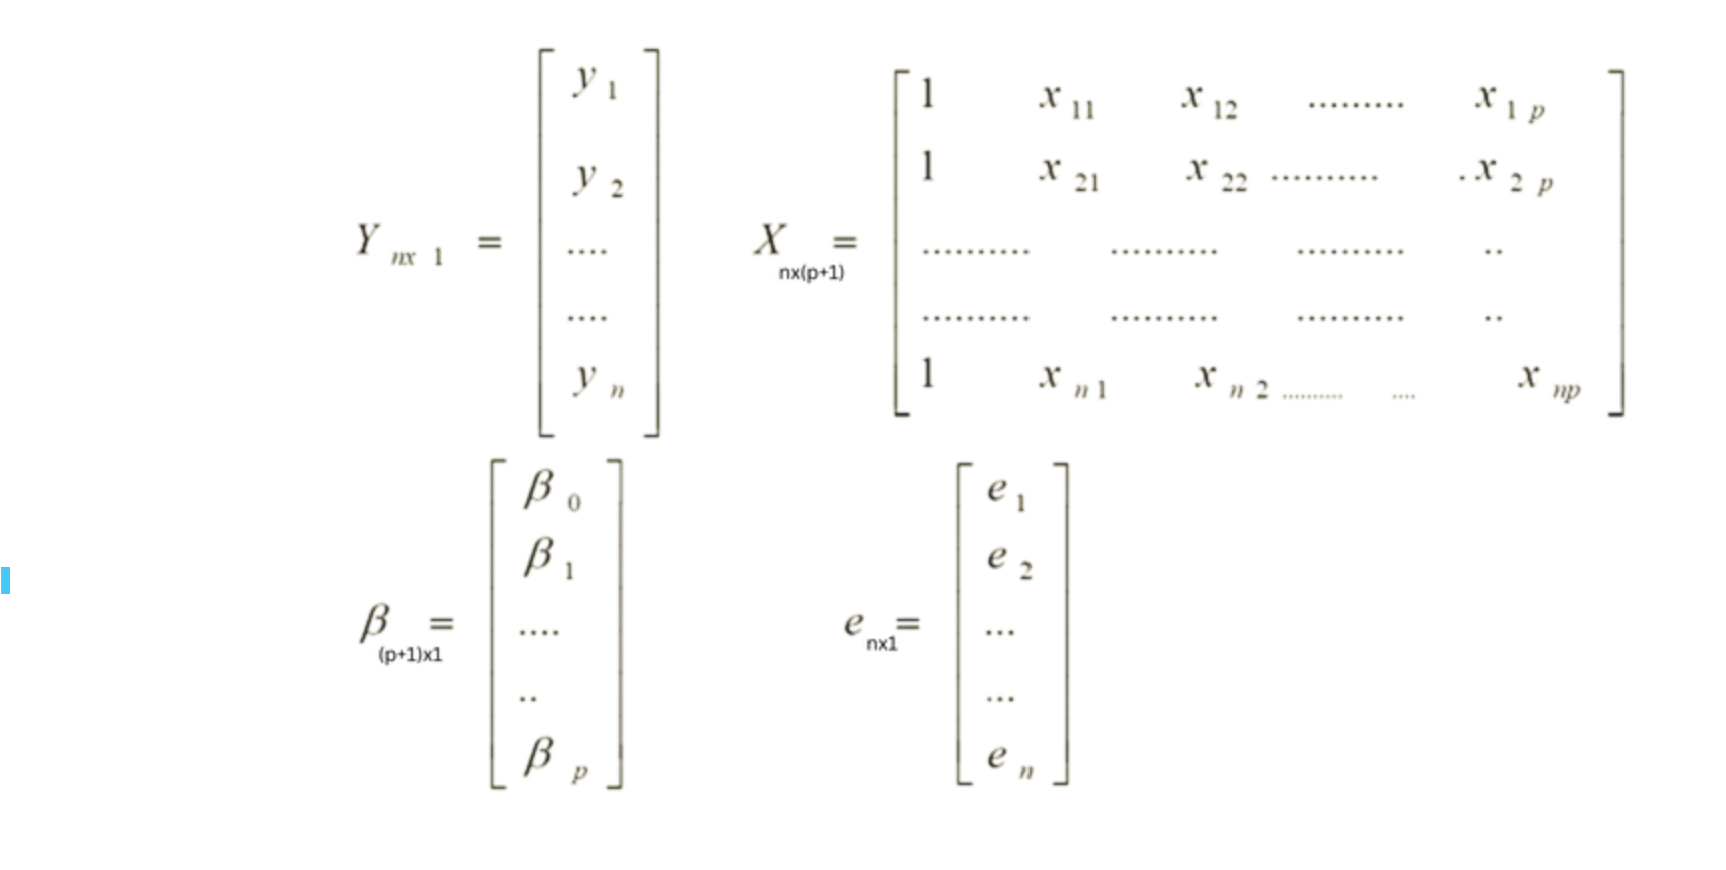

In [1]:
#| echo: false
#| eval: true

from IPython.display import Image

Image(filename='matrix.png')

### Least Square Method:
The least squares (LS) criterion states that the sum of the square of errors (or residuals) is minimum.
Mathematically, following quantity is minimized to parameters using least square method.


> Error ss = $∑(Yi - Yi)^2$<br>

### Objective: Estimating unknown parameters by minimizing Z using partial derivation

$e = Y - Xβ$<br>
$Z = e'e = ∑ei^{2} = (Y-Xβ)'(Y-Xβ)$<br>
$δZ/δβ = 0$<br>
$δZ/δβ = δ/δβ [( Y-Xβ)'(Y-Xβ)] = 0$<br>
$δZ/δβ = δ/δβ [(Y' - β'X')(Y-Xβ)]=0$<br>
$δZ/δβ = δ/δβ[Y'Y - Y'Xβ - Yβ'X' + β'X'Xβ]=0$<br>
$δZ/δβ = δ/δβ(Y'Y -  Yβ'X' - Yβ'X' + β'X'Xβ) = 0$ (since X and β are scalar) <BR>
$δZ/δβ = δ/δβ(Y'Y - 2Yβ'X' + β'X'Xβ)$ <BR>
$-2X'Y + 2X'Xβ = 0$ <BR>
$X'Xβ=X'Y$ <BR>
$𝛃 = (X'X)^{-1}X'Y$

### Illustrating the above equation in dataset imported below:

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Data Description:<br>
The dataset includes scores from tests conducted prior to recruitment, with columns representing different types of assessments. The columns in the dataset are as follows:

| Column  | Description                                                                                  |
|-------------|--------------------------------------------------------------------------------------------------|
| jpi     | Scores from the Job Performance Index (JPI) test, which measures candidates' predicted job performance. |
| aptitude| Scores from the Aptitude Test, assessing candidates' problem-solving and reasoning abilities. |
| tol     | Scores from the Tolerance Test, evaluating candidates' ability to handle stress and pressure. |
| technical| Scores from the Technical Test, which gauges candidates' technical skills and knowledge relevant to the job. |
| general | Scores from the General Knowledge Test, covering candidates' general awareness and knowledge. |

Upon assessing this dataset, we can say that we have one dependent variable(jpi) and three indepenent variables (tol,technical,aptitude,general).

In [3]:
Performance_Index = pd.read_csv('Performance Index.csv')
pd.set_option('display.max_rows', 10)
print(Performance_Index)


    empid    jpi  aptitude    tol  technical  general
0       1  45.52     43.83  55.92      51.82    43.58
1       2  40.10     32.71  32.56      51.49    51.03
2       3  50.61     56.64  54.84      52.29    52.47
3       4  38.97     51.53  59.69      47.48    47.69
4       5  41.87     51.35  51.50      47.59    45.77
..    ...    ...       ...    ...        ...      ...
28     29  43.00     55.08  68.53      50.32    54.25
29     30  49.45     54.36  55.77      50.83    47.98
30     31  45.34     43.92  44.89      51.64    50.53
31     32  34.88     69.01  47.56      46.46    40.31
32     33  64.04     55.32  66.64      67.27    53.50

[33 rows x 6 columns]


In [4]:
y = Performance_Index['jpi']
y_vector = y.to_numpy().reshape(-1,1) #-1 is used to simplify the reshaping process and ensure that the array is reshaped correctly without manually specifying each dimension size
print(y_vector[:5])

[[45.52]
 [40.1 ]
 [50.61]
 [38.97]
 [41.87]]


In [5]:
x = Performance_Index[['aptitude','tol','technical','general']]

df = x.to_numpy()
dx = np.ones((len(df),1))
x_matrix = np.concatenate((dx,df),axis=1)

print(x_matrix[:5])

[[ 1.   43.83 55.92 51.82 43.58]
 [ 1.   32.71 32.56 51.49 51.03]
 [ 1.   56.64 54.84 52.29 52.47]
 [ 1.   51.53 59.69 47.48 47.69]
 [ 1.   51.35 51.5  47.59 45.77]]


In [6]:
equation1 = np.linalg.inv(np.dot(x_matrix.T,x_matrix))
equation2 = np.dot(x_matrix.T,y_vector)
beta = np.dot(equation1,equation2)
beta


array([[-5.42822470e+01],
       [ 3.23561830e-01],
       [ 3.33724142e-02],
       [ 1.09546675e+00],
       [ 5.36833950e-01]])

### Calculating variance for 𝝱 and Y then calculating standard error using variance of β<br>
$Y=Xβ + e$ <br>
$Var(Y) = Var(Xβ + e)$ <br>
Since X and β are non random variables, $Var(Xβ)=0$<br>
Therefore, $Var(Y)=Var(e)=σ^2I$<br>
We calculated above,$𝛃 = (X'X)^{-1}(X'Y)$<br>
$Var(𝛃)=Var[(X'X)^{-1}X'Y]$

> Note: $Var(AB) = AVar(B)A'$ where A is a non random variable and B is a random variable.<br>


$Var(𝛃)=(X'X)^{-1}X'Var(Y)[(X'X)^{-1}X']'$<br>
$Var(𝛃)=(X'X)^{-1}X'σ^2I[(X'X)^{-1}]'X$<br>


> Since X is symmetric, by definition, $(X'X)^{-1}=[(X'X)^{-1}]'$<BR>


$Var(𝛃) = σ^2[(X'X)^{-1}X'X(X'X)^{-1}]$


> Using property of inverses, $A^{-1}A=I$


Therefore, $Var(𝛃)=σ^2(X'X)^{-1}$ 

### Formulas used below <br>
$e=Y-Xβ$<br>
$σ^2= e'e/n-p-1$, where n is the number of observations and p is number of independent variables



In [8]:
error = y_vector - np.dot(x_matrix,beta)
print(error[:5])

[[ 3.59203595]
 [-1.08828581]
 [-0.71407208]
 [-3.02726598]
 [ 1.11451506]]


In [9]:
Z = np.dot(error.T,error)
sigmasquare = Z/(len(y)-4-1)
sigmasquare

array([[12.59716999]])

In [10]:
betacapvar = sigmasquare * np.linalg.inv(np.dot(x_matrix.T,x_matrix))
betacapvar

array([[ 5.46790017e+01, -2.04513324e-01,  1.88888428e-02,
        -7.76589956e-01, -8.46603892e-02],
       [-2.04513324e-01,  4.59417199e-03, -1.48808279e-03,
         2.97726800e-03, -2.28288799e-03],
       [ 1.88888428e-02, -1.48808279e-03,  5.07557954e-03,
        -3.21816890e-03, -9.61729605e-04],
       [-7.76589956e-01,  2.97726800e-03, -3.21816890e-03,
         3.29003721e-02, -1.87171618e-02],
       [-8.46603892e-02, -2.28288799e-03, -9.61729605e-04,
        -1.87171618e-02,  2.50918495e-02]])

In [11]:
diagonal_elements = np.diag(betacapvar)
standard_error = np.sqrt(diagonal_elements)
standard_error

array([7.39452512, 0.06778032, 0.0712431 , 0.1813846 , 0.15840407])

### Checking if the manually calculated parameter estimates and standard errors match those obtained from the OLS regression results.

In [12]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    jpi   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     49.81
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           2.47e-12
Time:                        10:26:05   Log-Likelihood:                -85.916
No. Observations:                  33   AIC:                             181.8
Df Residuals:                      28   BIC:                             189.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.2822      7.395     -7.341      0.000     -69.429     -39.135
aptitude       0.3236      0.068      4.774      0.000       0.185       0.462
tol            0.0334      0.071      0.468      0.643      -0.113       0.179
technical      1.0955      0.181      6.039      0.000       0.724       1.467
general        0.5368      0.158      3.389      0.002       0.212       0.861
==============================================================================
Omnibus:                        2.124   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.944
Skew:                          -0.544   Prob(JB):                        0.378
Kurtosis:                       2.518   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Upon comparing the calculated values with the OLS results, we can confirm that both the parameter estimates and standard errors match, thereby validating the derived equations and ensuring the accuracy of the computations.

##### We will execute the same code using Scikitlearn and check if estimated coefficient values compare:

In [13]:
X = Performance_Index[['aptitude', 'tol', 'general', 'technical']]
y = Performance_Index['jpi']

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print("Intercept:", round(model.intercept_,4))
print("Coefficients:", (model.coef_))

Intercept: -54.2822
Coefficients: [0.32356183 0.03337241 0.53683395 1.09546675]


##### Upon comparing the values with OLS and calculated results, we can verify that the values match thereby ensuring the accuracy of the computations.